In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pwd()

'C:\\Users\\Somesh\\Practicals'

In [3]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [4]:
rpTestData=pd.read_csv('Credit.csv')
rpTestData.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


# Exploratory Data Analysis

In [5]:
pandas_profiling.ProfileReport(rpTestData)

Number of variables,11
Number of observations,400
Total Missing (%),0.0%
Total size in memory,34.5 KiB
Average record size in memory,88.2 B
Numeric,6
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [6]:
rpTestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [7]:
rpTestData.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


# Data Visualization

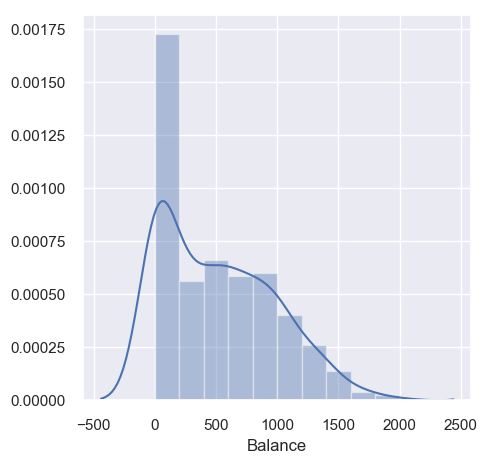

In [8]:
# set the size of the figure
sns.set(rc={'figure.figsize':(5,5)})

# plot a histogram showing the distribution of the target values
sns.distplot(rpTestData['Balance'], bins=10)
plt.show()

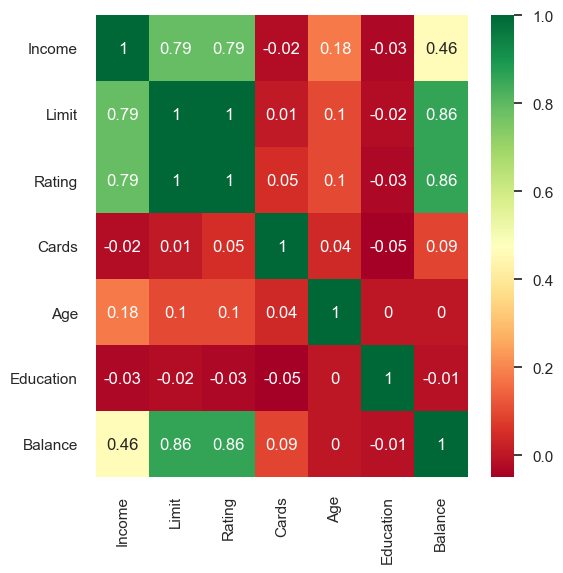

In [9]:
# compute the pair wise correlation for all columns  
correlation_matrix = rpTestData.corr().round(2)
plt.subplots(figsize=(6,6))
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, cmap='RdYlGn',annot=True)
plt.show();

In [10]:
dummyCoding = pd.DataFrame(rpTestData, columns = ['Gender', 'Married', 'Ethnicity','Student'])
dummyCoding

,Gender,Married,Ethnicity,Student
0,Male,Yes,Caucasian,No
1,Female,Yes,Asian,Yes
2,Male,No,Asian,No
3,Female,No,Asian,No
4,Male,Yes,Caucasian,No
5,Male,No,Caucasian,No
6,Female,No,African American,No
7,Male,No,Asian,No
8,Female,No,Caucasian,No
9,Female,Yes,African American,Yes


In [11]:
for col in rpTestData.columns:
    if rpTestData[col].dtype=='object':
        rpTestData[col]=pd.Categorical(rpTestData[col]).codes

In [12]:
rpTestData

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,0,0,1,2,333
1,106.025,6645,483,3,82,15,1,1,1,1,903
2,104.593,7075,514,4,71,11,0,0,0,1,580
3,148.924,9504,681,3,36,11,1,0,0,1,964
4,55.882,4897,357,2,68,16,0,0,1,2,331
5,80.180,8047,569,4,77,10,0,0,0,2,1151
6,20.996,3388,259,2,37,12,1,0,0,0,203
7,71.408,7114,512,2,87,9,0,0,0,1,872
8,15.125,3300,266,5,66,13,1,0,0,2,279
9,71.061,6819,491,3,41,19,1,1,1,0,1350


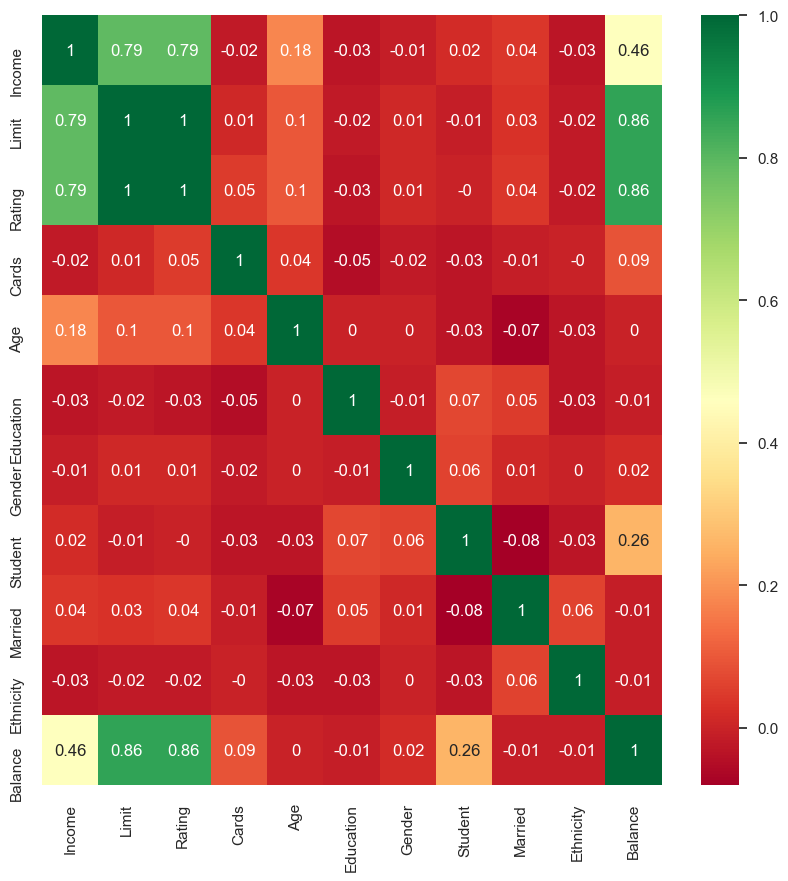

In [13]:
# compute the pair wise correlation for all columns  
correlation_matrix = rpTestData.corr().round(2)
plt.subplots(figsize=(10,10))
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, cmap='RdYlGn',annot=True)
plt.show();

# Train Test Split

In [14]:
y = rpTestData['Balance']

In [15]:
X = rpTestData[['Income','Limit','Rating','Cards','Age','Education','Gender','Student','Married','Ethnicity']]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
rpTestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null int8
Student      400 non-null int8
Married      400 non-null int8
Ethnicity    400 non-null int8
Balance      400 non-null int64
dtypes: float64(1), int64(6), int8(4)
memory usage: 23.5 KB


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(280, 10)

(120, 10)

(280,)

(120,)

# Creating and Training the Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
print('Coefficients: \n',lin_model.coef_)

Coefficients: 
 [-7.89548610e+00  1.90781771e-01  1.18467070e+00  1.51273175e+01
 -6.92474656e-01  3.50192007e-01 -1.27845895e+00  4.26281735e+02
 -1.05072840e+01  8.25884463e+00]


In [21]:
coefficients = pd.DataFrame(lin_model.coef_,X.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
Income,-7.895486
Limit,0.190782
Rating,1.184671
Cards,15.127318
Age,-0.692475
Education,0.350192
Gender,-1.278459
Student,426.281735
Married,-10.507284
Ethnicity,8.258845


# Predicting Test Data

Text(0.5,0,'Y Test')

Text(0,0.5,'Predictions')

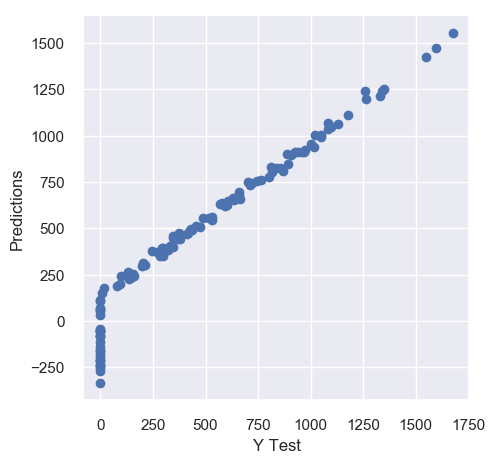

In [22]:
predictions = lin_model.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

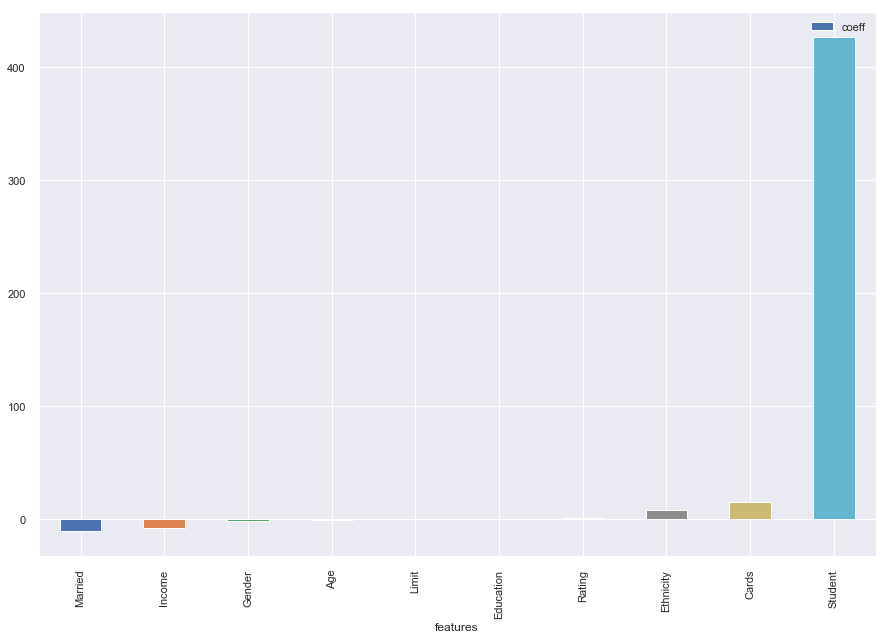

In [37]:
df_m.plot(x='features', y='coeff', kind='bar', figsize=(15,10))
plt.show()

# Evaluating the Model

In [23]:
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MSE:  10686.473371579068
RMSE:  103.375400224517


In [24]:
print("RSquare Value for Train Data is - ", np.round(lin_model.score(X_train, y_train)*100,0))

print("RSquare Value for Test Data is - ", np.round(lin_model.score(X_test, y_test)*100,0))

RSquare Value for Train Data is -  96.0
RSquare Value for Test Data is -  94.0


In [25]:
import statsmodels.formula.api as smf
model = smf.ols('Balance ~ Income+Limit+Rating+Cards+Age+Education+Gender+Student+Married+Ethnicity' ,data=rpTestData).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     825.2
Date:                Sat, 12 Jan 2019   Prob (F-statistic):          6.28e-255
Time:                        12:28:48   Log-Likelihood:                -2399.2
No. Observations:                 400   AIC:                             4820.
Df Residuals:                     389   BIC:                             4864.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -473.8556     35.378    -13.394      0.0

In [26]:
import statsmodels.formula.api as smf
model = smf.ols('Balance ~ Income+Limit+Rating+Cards+Student' ,data=rpTestData).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Sat, 12 Jan 2019   Prob (F-statistic):          3.60e-261
Time:                        12:28:48   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -526.1555     19.747    -26.645      0.0